In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape


(205, 26)

## preprocessing steps

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<Axes: >

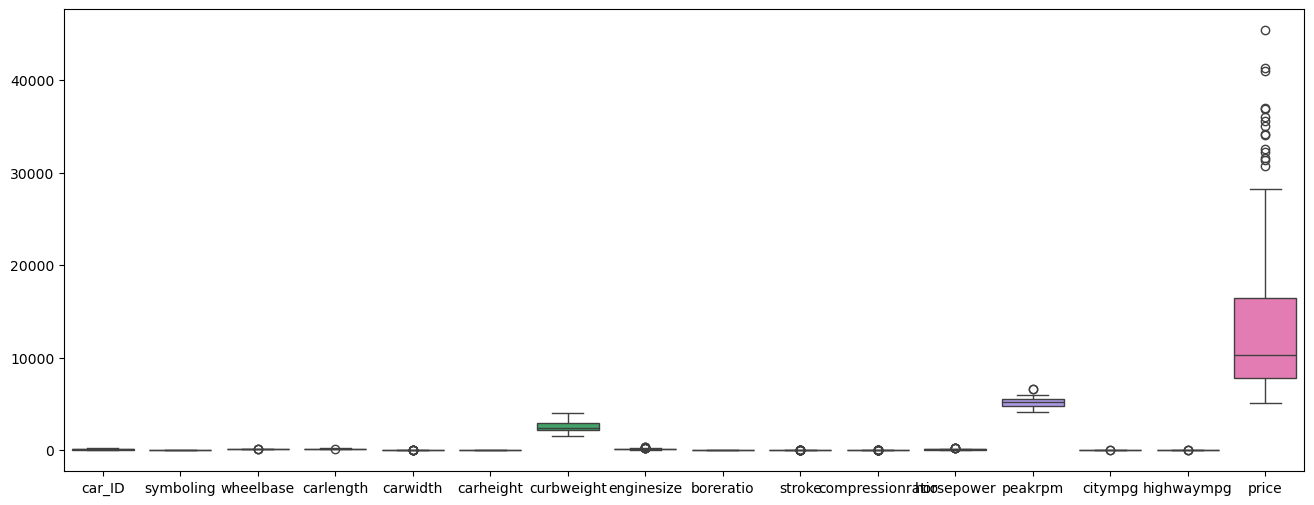

In [11]:
plt.figure(figsize=(16,6))
sns.boxplot(df)

Here the target variable price contains high oultlier.If i remove it,it effects the prediction.

all others contains less outliers which can be seen from the plot.so not removing it.

encoding

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [14]:
df.select_dtypes(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


The above   columns are the one that need to be encoded in to numerical one

In [24]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

The below columns are the one that contains more than 2 unique values.hence they are encoded using label encoder.

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['CarName']=le.fit_transform(df['CarName'])
df['carbody']=le.fit_transform(df['carbody'])
df['drivewheel']=le.fit_transform(df['drivewheel'])
df['enginetype']=le.fit_transform(df['enginetype'])
df['cylindernumber']=le.fit_transform(df['cylindernumber'])
df['fuelsystem']=le.fit_transform(df['fuelsystem'])

In [ ]:
print("CarName",df['CarName'].unique())
print("carbody",df['carbody'].unique())
print("drivewheel",df['drivewheel'].unique())
print("enginetype",df['enginetype'].unique())
print("cylindernumber",df['cylindernumber'].unique())
print("fuelsystem",df['fuelsystem'].unique())

CarName [  2   3   1   4   5   9   7   6   8  10  11  12  15  13  14  24  25  26
  35  27  32  34  29  28  30  33  31  39  43  37  38  42  36  41  44  40
  47  45  46  49  48  50  52  51  61  59  58  53  54  60  55  57  56  19
  17  16  22  20  23  18  21  62  65  64  68  63  66  67  69   0  73  81
  76  83  77  74  78  70  79  71  72  80  82  75  85  84  86  88  87  92
  89  93  91  94  90  98  95  97  96  99 100 101 103 102 104 107 106 105
 108 109 110 111 123 120 116 121 117 112 125 115 118 114 119 122 126 127
 124 113 128 129 130 133 137 131 136 132 145 146 134 135 139 138 140 141
 143 144 142]
carbody [0 2 3 4 1]
drivewheel [2 1 0]
enginetype [0 5 3 2 6 4 1]
cylindernumber [2 3 1 4 5 6 0]
fuelsystem [5 1 4 0 7 2 3 6]


Below columns contains only two unique values in it.hence they are encoded using One hot encoder.

In [28]:
df.select_dtypes(include='object')

,fueltype,aspiration,doornumber,enginelocation
0,gas,std,two,front
1,gas,std,two,front
2,gas,std,two,front
3,gas,std,four,front
4,gas,std,four,front
...,...,...,...,...
200,gas,std,four,front
201,gas,turbo,four,front
202,gas,std,four,front
203,diesel,turbo,four,front


In [ ]:
df['fueltype']=pd.get_dummies(df['fueltype'],drop_first=True,dtype=int)
df['aspiration']=pd.get_dummies(df['aspiration'],drop_first=True,dtype=int)
df['doornumber']=pd.get_dummies(df['doornumber'],drop_first=True,dtype=int)
df['enginelocation']=pd.get_dummies(df['enginelocation'],drop_first=True,dtype=int)

In [32]:
print("fueltype",df['fueltype'].unique())
print("aspiration",df['aspiration'].unique())
print("doornumber",df['doornumber'].unique())
print("enginelocation",df['enginelocation'].unique())

fueltype [1 0]
aspiration [0 1]
doornumber [1 0]
enginelocation [0 1]


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

Now all the columns contains numeric values.



feature scaling

For Proper model evaluation and to avoid data leakage,need to split the dataset into features and target

In [45]:
x=df.drop('price',axis=1)
y=df['price']

In [48]:
x

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,2,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,2,3,3,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,3,1,1,1,0,1,2,2,0,94.5,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,4,2,4,1,0,0,3,1,0,99.8,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,5,2,5,1,0,0,3,0,0,99.4,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,202,-1,138,1,1,0,3,2,0,109.1,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,203,-1,140,1,0,0,3,2,0,109.1,...,3,173,5,3.58,2.87,8.8,134,5500,18,23
203,204,-1,142,0,1,0,3,2,0,109.1,...,3,145,3,3.01,3.40,23.0,106,4800,26,27


In [49]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

Here the datas are splitted into x and y.That is features and target

lets scale the features using standard scalar

standar scalar is best for below models :

Linear Regression

Support Vector Regression (SVR)
etc..

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [52]:
x=pd.DataFrame(x)
print(x)

           0         1         2         3         4         5         6   \
0   -1.723622  1.743470 -1.838221  0.328798 -0.469295  1.130388 -3.050975   
1   -1.706724  1.743470 -1.813780  0.328798 -0.469295  1.130388 -3.050975   
2   -1.689826  0.133509 -1.862662  0.328798 -0.469295  1.130388 -0.717207   
3   -1.672928  0.938490 -1.789339  0.328798 -0.469295 -0.884652  0.449677   
4   -1.656029  0.938490 -1.764897  0.328798 -0.469295 -0.884652  0.449677   
..        ...       ...       ...       ...       ...       ...       ...   
200  1.656029 -1.476452  1.510231  0.328798 -0.469295 -0.884652  0.449677   
201  1.672928 -1.476452  1.485790  0.328798  2.130854 -0.884652  0.449677   
202  1.689826 -1.476452  1.534673  0.328798 -0.469295 -0.884652  0.449677   
203  1.706724 -1.476452  1.583555 -3.041381  2.130854 -0.884652  0.449677   
204  1.723622 -1.476452  1.607996  0.328798  2.130854 -0.884652  0.449677   

           7         8         9   ...        15        16        17  \
0  

the next processes is regression model implementation

## Model building 

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

Linear regression

In [56]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr_pred

array([25300.70079334, 17594.95552418,  9635.07790519, 13329.24931557,
       26706.98640193,  6266.70138824,  7525.41864723,  5804.98192171,
        8987.14466068,  5563.7652835 , 13810.2660074 ,  6113.6900557 ,
       16086.8892634 , 10733.24970142, 40606.56035409,  7029.40688912,
         410.42326146, 14818.61990556,  9776.65701163, 10315.42563313,
       10946.06090261, 20814.6332298 ,  8570.48429825,  3834.57446827,
        7773.10100332, 23681.21378039, 14446.40719184, 15692.04557601,
        5023.02239579, 16125.21529392, 26910.46364142,  7734.66201649,
        4108.28668316, 22305.89024656,  8223.03651371, 27546.94120749,
       10350.79011808, 10328.20324527,  7009.71229271, 15235.93467129,
        7470.11726595, 12730.98385921, 18643.03851927,  4473.71944998,
        6875.15480183, 10035.02149652,  8851.39707779,  6800.78743072,
       18175.37065725, 15496.77966608,  7196.38684463, 20012.87702317,
        3157.87904311,  9351.65202697,  4633.83381211, 14064.4549695 ,
      

In [57]:
mae=mean_absolute_error(y_test,lr_pred)
mse=mean_squared_error(y_test,lr_pred)
r2=r2_score(y_test,lr_pred)
print("mae",mae)
print("mse",mse)
print("r2",r2)

mae 2193.173601916027
mse 10990246.827291736
r2 0.8320438707011806


Fits a straight line through the data to predict a continuous numeric target.It Assumes a linear relationship between features and target.

decision tree regressor

In [61]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)
dtr_pred

array([36880., 18399.,  8949., 12170., 31600.,  5118.,  7898.,  8358.,
        8949.,  7995., 15510.,  8058., 16500., 10898., 45400.,  6338.,
        5399., 14869.,  6989.,  9298., 10595., 14399.,  5118.,  5399.,
        7609., 36880.,  9989., 16515.,  6692., 15985., 31600.,  6669.,
        8778., 19045.,  7957., 31600.,  9279., 13645.,  6575., 14869.,
        8013.,  8845., 13860.,  8778.,  7299.,  8499.,  6377.,  7126.,
       17950., 14869.,  6529., 15998.,  7395., 10245.,  6692., 12945.,
        9989., 13645., 32528.,  5572., 16695., 19699., 10898., 18399.,
       13845.,  6529., 21105.,  7299.])

In [63]:
mae=mean_absolute_error(y_test,dtr_pred)
mse=mean_squared_error(y_test,dtr_pred)
r2=r2_score(y_test,dtr_pred)
print("mae",mae)
print("mse",mse)
print("r2",r2)


mae 1737.88725
mse 6408774.101733662
r2 0.9020592613985037


Splits data into branches based on feature values, forming a tree.
Each leaf node predicts a value.It can capture non-linear relationships between features and house prices.

random forest regressor

In [91]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=42)
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
rfr_pred

array([35214.735, 19506.22 ,  9025.26 , 13493.72 , 27257.56 ,  6655.38 ,
        8138.76 ,  8028.07 , 10071.1  ,  8182.9  , 14789.29 ,  7904.57 ,
       14983.91 , 10986.13 , 40041.03 ,  6518.01 ,  6154.11 , 14929.53 ,
        8040.74 ,  9413.23 , 10446.63 , 14999.26 ,  6632.33 ,  6142.08 ,
        7386.01 , 35104.97 , 10524.13 , 16639.28 ,  7120.59 , 16553.52 ,
       27247.135,  6650.76 ,  8601.9  , 18981.265,  8110.   , 27133.675,
       10061.75 , 13757.77 ,  7532.355, 14996.11 ,  8898.64 , 11371.77 ,
       14354.01 ,  8213.99 ,  7122.05 ,  8701.56 ,  6908.01 ,  7685.855,
       15402.04 , 15837.33 ,  7040.41 , 16790.17 ,  6966.12 , 10593.77 ,
        7080.95 , 15201.75 , 10476.91 , 13757.77 , 32159.355,  5895.695,
       11614.87 , 17891.56 , 11023.01 , 18051.87 , 11273.39 ,  6834.545,
       18019.15 ,  7187.19 ])

In [92]:
mae=mean_absolute_error(y_test,rfr_pred)
mse=mean_squared_error(y_test,rfr_pred)
r2=r2_score(y_test,rfr_pred)
print("mae",mae)
print("mse",mse)
print("r2",r2)

mae 1403.869382352941
mse 3897907.692497559
r2 0.9404310477567944


Ensemble of multiple decision trees trained on random subsets of data and features.
Final prediction is the average of all trees.

Reduces overfitting compared to a single decision tree.

gradient booster regressor

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
gdr=GradientBoostingRegressor()
gdr.fit(x_train,y_train)
gdr_pred=gdr.predict(x_test)
gdr_pred

array([36692.53210901, 20457.46893099,  8469.23952161, 13379.34167395,
       32471.83310224,  6715.83792306,  7970.43330513,  7453.61439336,
        8975.84519519,  8193.97654131, 14092.53236929,  7795.563912  ,
       14731.53645709, 11326.93505865, 44226.56368735,  6244.37367262,
        5152.04856885, 14480.06062721,  7845.50311338,  8918.53241078,
       10116.92461183, 14825.76055031,  6983.76763869,  5778.08293956,
        7067.52076784, 36740.22945013, 11455.67820933, 16407.72987891,
        6804.52395214, 16362.89166519, 32828.94994815,  6407.5477594 ,
        7403.05389481, 18845.50721162,  8275.56746442, 31762.72694781,
        9495.18525834, 13751.27851258,  7943.03735904, 14609.10816011,
        7876.58369328,  9991.74483477, 15456.65580897,  7242.25139886,
        6780.45554812,  8665.96504301,  6596.3567509 ,  7085.13576771,
       15556.65031777, 15983.53769928,  7038.19272495, 16389.11732739,
        6973.61991066, 11258.24407521,  6804.52395214, 15684.86228024,
      

In [70]:
mae=mean_absolute_error(y_test,gdr_pred)
mse=mean_squared_error(y_test,gdr_pred)
r2=r2_score(y_test,gdr_pred)
print("mae",mae)
print("mse",mse)
print("r2",r2)

mae 1594.9589684487385
mse 5291515.233859643
r2 0.9191335344172784


Builds trees sequentially, where each new tree tries to correct the errors of previous trees.Then Combines all trees for final prediction.

High accuracy for datasets with non-linear relationships.

Works well when small improvements in predictions matter.

SVR

In [71]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
svr_pred=svr.predict(x_test)
svr_pred

array([10810.12351147, 10800.8283874 , 10780.30639314, 10798.72666829,
       10806.85471878, 10771.14978435, 10792.6711795 , 10777.69308412,
       10793.32032386, 10793.19755433, 10799.66842207, 10780.93140044,
       10805.07929984, 10794.4204334 , 10805.05847468, 10775.59253351,
       10792.0538849 , 10801.59080769, 10780.71154176, 10791.04637016,
       10785.78014695, 10806.09124898, 10775.31983122, 10787.94675591,
       10775.12404061, 10809.54036693, 10798.77515083, 10808.64231404,
       10774.89889671, 10808.1447133 , 10807.22517498, 10773.54712822,
       10785.79247271, 10809.14605882, 10786.90299864, 10805.00511494,
       10796.24412651, 10801.18311133, 10775.0135308 , 10801.86841664,
       10787.30070409, 10799.1678583 , 10807.61140732, 10783.69511696,
       10772.16880274, 10778.46206361, 10775.22489106, 10784.71913154,
       10806.92860499, 10800.34938903, 10775.5413357 , 10805.49160097,
       10792.09593325, 10793.53421594, 10774.90208059, 10796.18649655,
      

In [72]:
mae=mean_absolute_error(y_test,svr_pred)
mse=mean_squared_error(y_test,svr_pred)
r2=r2_score(y_test,svr_pred)
print("mae",mae)
print("mse",mse)
print("r2",r2)

mae 5330.608525941936
mse 69787390.79152572
r2 -0.06651108163483599


Tries to fit a line (or hyperplane) that predicts target within a tolerance margin.



From the above model evaluation :

the best model is Random forest regressor which contains the highest r2 value.That is 0.94

Random Forest model is very strong — it captures nearly all the variation in car prices.

the worst model is svr which contains the negative value as r2

## Feature Selection

In [82]:
importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': rfr.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Top Important Features Affecting Car Price:\n")
print(importance.head(10))


Top Important Features Affecting Car Price:

    Feature  Importance
16       16    0.585271
13       13    0.197821
24       24    0.097302
11       11    0.030252
21       21    0.024273
10       10    0.012468
0         0    0.011349
2         2    0.006834
22       22    0.005105
20       20    0.004038


In [81]:
df.shape

(205, 26)

In [87]:
print("16=",df.columns[16])
print("13=",df.columns[13])
print("24=",df.columns[24])
print("11=",df.columns[11])
print("21=",df.columns[21])
print("10=",df.columns[10])
print("0=",df.columns[0])
print("2=",df.columns[2])
print("22=",df.columns[22])
print("20=",df.columns[20])

16= enginesize
13= curbweight
24= highwaympg
11= carwidth
21= horsepower
10= carlength
0= car_ID
2= CarName
22= peakrpm
20= compressionratio


from the 25 features the best 10 features/variables are the given above.

as i havent gievn the columns name for the x_train ones,they are shown as numbers.So i had shown the columns like that


## Hyperparameter tuning

tuning an be done for the best model(random forest regressor)

In [88]:
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid,
    cv=5,              # 5-fold cross-validation
    n_jobs=-1,         # Use all CPU cores
    scoring='r2',      # Optimize for R²
    verbose=2
)

grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R² Score: 0.9054792437549588


In [89]:
best_rfr = grid_search.best_estimator_

# Train again on the full training set
best_rfr.fit(x_train, y_train)

y_pred_best = best_rfr.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("R2 :", r2_score(y_test, y_pred_best))


MAE: 1472.1654852941176
MSE: 5529110.282926277
R2 : 0.9155025381886315


when i have done the hyperparameter tuning r2 value has reduced.Hence tuning decreases the value.
that means tuning is not needed for this dataset.

In [90]:
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
print("MAE:", mean_absolute_error(y_test,rfr_pred))
print("MSE:", mean_squared_error(y_test,rfr_pred))
print("R2 :", r2_score(y_test,rfr_pred))


MAE: 1403.869382352941
MSE: 3897907.692497559
R2 : 0.9404310477567944


This is enough for the dataset